In [158]:
import pandas as pd
import sweetviz as sv
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [135]:
filepath = "data/ground-truth/Customer Segmentation Test DS4BC FHK_Dataset.csv"

In [150]:
df = pd.read_csv(filepath, sep=';', decimal=',')

/var/folders/1v/z5r7qqm173d03z8jk9x6x9xm0000gn/T/ipykernel_38644/3444549304.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=';', decimal=',')


In [151]:
df = pd.DataFrame(df)
df.head()

,Customer Number,Gender,Date of Birth,Postcode,COUNT2015,SUM2015,MERCHANDISE2015,COUNT2016,SUM2016,MERCHANDISE2016,...,SUM2017,MERCHANDIESE2017,COUNT2018,SUM2018,MERCHANDIESE2018,COUNT2019,SUM2019,MERCHANDISE2019,LastPaymentDate,PenultimatePaymentDate
0,1,female,NaN,NaN,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,4.50,0,18.12.2019,NaN
1,2,female,NaN,NaN,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,1.53,0,28.12.2019,NaN
2,3,female,NaN,NaN,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,3.00,0,05.12.2019,NaN
3,4,female,NaN,NaN,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,4.50,0,04.06.2019,NaN
4,5,female,NaN,NaN,0,0.0,0,0,0.0,0,...,0.0,0,0,0.0,0,1,4.95,0,30.03.2019,NaN


In [138]:
df.shape    

(406734, 21)

In [152]:
df.isna().sum()
df = df.fillna(0)

In [154]:
df.isna().sum()

Customer Number           0
Gender                    0
Date of Birth             0
Postcode                  0
COUNT2015                 0
SUM2015                   0
MERCHANDISE2015           0
COUNT2016                 0
SUM2016                   0
MERCHANDISE2016           0
COUNT2017                 0
SUM2017                   0
MERCHANDIESE2017          0
COUNT2018                 0
SUM2018                   0
MERCHANDIESE2018          0
COUNT2019                 0
SUM2019                   0
MERCHANDISE2019           0
LastPaymentDate           0
PenultimatePaymentDate    0
dtype: int64

In [143]:
df.dtypes

Customer Number             int64
Gender                     object
Date of Birth              object
Postcode                   object
COUNT2015                   int64
SUM2015                   float64
MERCHANDISE2015             int64
COUNT2016                   int64
SUM2016                   float64
MERCHANDISE2016             int64
COUNT2017                   int64
SUM2017                   float64
MERCHANDIESE2017            int64
COUNT2018                   int64
SUM2018                   float64
MERCHANDIESE2018            int64
COUNT2019                   int64
SUM2019                   float64
MERCHANDISE2019             int64
LastPaymentDate            object
PenultimatePaymentDate     object
dtype: object

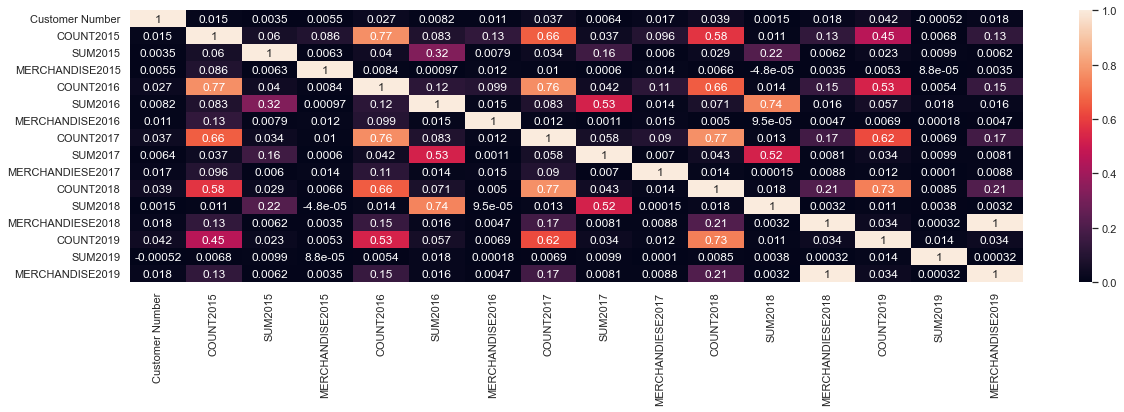

In [94]:
corr = df.corr()

sns.heatmap(corr, annot=True)
sns.set(rc = {'figure.figsize':(25,5)})

In [29]:
df.describe()

,Customer Number,COUNT2015,MERCHANDISE2015,COUNT2016,MERCHANDISE2016,COUNT2017,MERCHANDIESE2017,COUNT2018,MERCHANDIESE2018,COUNT2019,MERCHANDISE2019
count,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000
mean,203367.500000,2.515846,0.012020,1.215222,0.012659,1.060147,0.010710,0.999535,0.012942,0.966135,0.012942
std,117414.136532,4.003249,0.108976,2.022572,0.111800,1.906066,0.102932,1.865846,0.113025,1.787805,0.113025
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101684.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,203367.500000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,305050.750000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,406734.000000,96.000000,1.000000,178.000000,1.000000,95.000000,1.000000,49.000000,1.000000,31.000000,1.000000


In [142]:
df["Date of Birth"].values

array([0, 0, 0, ..., '19.04.1962', '19.04.1962', '20.04.1962'],
      dtype=object)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406734 entries, 0 to 406733
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Customer Number         406734 non-null  int64  
 1   Gender                  406734 non-null  object 
 2   Date of Birth           406734 non-null  object 
 3   Postcode                406734 non-null  object 
 4   COUNT2015               406734 non-null  int64  
 5   SUM2015                 406734 non-null  float64
 6   MERCHANDISE2015         406734 non-null  int64  
 7   COUNT2016               406734 non-null  int64  
 8   SUM2016                 406734 non-null  float64
 9   MERCHANDISE2016         406734 non-null  int64  
 10  COUNT2017               406734 non-null  int64  
 11  SUM2017                 406734 non-null  float64
 12  MERCHANDIESE2017        406734 non-null  int64  
 13  COUNT2018               406734 non-null  int64  
 14  SUM2018             

In [165]:
df2 = df.squeeze


In [168]:
today = datetime.date.today()
df["age"] = ((today - df["Date of Birth"]).datetime.days //365.25)


TypeError: unsupported operand type(s) for -: 'datetime.date' and 'int'

In [148]:
df = pd.DataFrame(df)
df.dtypes

Customer Number             int64
Gender                     object
Date of Birth              object
Postcode                   object
COUNT2015                   int64
SUM2015                   float64
MERCHANDISE2015             int64
COUNT2016                   int64
SUM2016                   float64
MERCHANDISE2016             int64
COUNT2017                   int64
SUM2017                   float64
MERCHANDIESE2017            int64
COUNT2018                   int64
SUM2018                   float64
MERCHANDIESE2018            int64
COUNT2019                   int64
SUM2019                   float64
MERCHANDISE2019             int64
LastPaymentDate            object
PenultimatePaymentDate     object
dtype: object

In [131]:
df['age'] = (datetime.date.today() - df[['Date of Birth']]) // datetime.timedelta(days=365.25)


KeyError: "None of [Index(['Date of Birth'], dtype='object')] are in the [index]"

In [157]:
df["SUM_TOTAL"] = df["SUM2015"] + df["SUM2016"] +  df["SUM2017"] + df["SUM2018"] + df["SUM2019"] 
df.describe()

,Customer Number,COUNT2015,SUM2015,MERCHANDISE2015,COUNT2016,SUM2016,MERCHANDISE2016,COUNT2017,SUM2017,MERCHANDIESE2017,COUNT2018,SUM2018,MERCHANDIESE2018,COUNT2019,SUM2019,MERCHANDISE2019,SUM_TOTAL
count,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,406734.000000,4.067340e+05,406734.000000,4.067340e+05
mean,203367.500000,2.515846,42.436171,0.012020,1.215222,50.929538,0.012659,1.060147,24.781610,0.010710,0.999535,20.638973,0.012942,0.966135,4.644049e+01,0.012942,1.852268e+02
std,117414.136532,4.003249,850.190394,0.108976,2.022572,591.051988,0.111800,1.906066,572.898922,0.102932,1.865846,1552.600084,0.113025,1.787805,3.999797e+03,0.113025,4.875613e+03
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.500000e-03
25%,101684.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000e+01
50%,203367.500000,2.000000,15.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,6.500000e+01
75%,305050.750000,2.000000,45.000000,0.000000,1.000000,50.000000,0.000000,1.000000,20.000000,0.000000,1.000000,15.000000,0.000000,1.000000,3.000000e+01,0.000000,1.575000e+02
max,406734.000000,96.000000,388113.600000,1.000000,178.000000,295599.800000,1.000000,95.000000,207134.740000,1.000000,49.000000,911146.500000,1.000000,31.000000,2.400000e+06,1.000000,2.400225e+06
